In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('tel_churn.csv')

In [ ]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df = df.drop('Unnamed: 0' , axis=1)

In [ ]:
#Creating X and Y variables
x = df.drop('Churn', axis=1)

In [ ]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
#Creating X and Y variables
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

#** Decision Tree Classifier**

The Decision Tree Classifier is a machine learning algorithm used for both classification and regression tasks. It builds a model in the form of a tree structure by partitioning the input data based on certain features. Here's a high-level overview of the Decision Tree Classifier:

Tree Structure: The Decision Tree algorithm starts with a root node and recursively splits the data into different branches based on the values of the selected features. Each internal node represents a decision based on a feature, while each leaf node represents the predicted class or value.

Feature Selection: The algorithm selects features to split the data based on various criteria, such as Gini impurity or information gain. These criteria measure the homogeneity or purity of the data in each split.

Recursive Splitting: The data is split recursively until a stopping condition is met, such as reaching a maximum depth, achieving a minimum number of samples per leaf, or obtaining a pure class distribution.

Classification: Once the tree is built, it can be used to classify new instances by traversing the tree from the root node to a leaf node, following the decision rules based on the selected features.

## Algorithm
The algorithm used by the Decision Tree Classifier is commonly known as the CART (Classification and Regression Trees) algorithm. Here is a summary of the CART algorithm:

Tree Construction: The algorithm starts with the entire dataset and selects the best feature to split the data based on a criterion such as Gini impurity or information gain. The selected feature is used as the root node of the tree.

Splitting: The dataset is divided into subsets based on the selected feature. Each subset corresponds to a branch or child node in the tree. This process is recursively applied to each child node until a stopping criterion is met.

Stopping Criteria: The recursive splitting process stops when one of the following conditions is met:

Maximum tree depth is reached.
Minimum number of samples required to split a node is not met.
All samples in a node belong to the same class.
A maximum number of leaf nodes is reached.
Prediction: Once the tree is constructed, classification of new instances is performed by traversing the tree from the root node down to a leaf node. The class label of the leaf node is assigned to the instance as the predicted class.

In [ ]:
model_dt = DecisionTreeClassifier(criterion ='gini', random_state=100, max_depth=6, min_samples_leaf=8)

*criterion='gini': This sets the impurity criterion to "gini" for evaluating the quality of a split. The "gini" criterion measures the impurity of a node by calculating the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of the labels in the node.*

*random_state=100: This sets the random seed to 100, ensuring reproducibility of the results. By using the same random seed, you can obtain consistent results when running the code multiple times.*

*max_depth=6: This sets the maximum depth of the decision tree to 6. The tree will be grown until either all leaves are pure or until the maximum depth is reached. Setting a maximum depth helps prevent overfitting and can lead to a more interpretable model.*

*min_samples_leaf=8: This sets the minimum number of samples required to be in a leaf node to 8. It specifies the minimum threshold to prevent further splitting of a node if the number of samples in that node is below the specified value. It also helps control overfitting by preventing the creation of small leaf nodes.*

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model_dt.predict(x_test)
 #to make predictions on the test data (x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
model_dt.score(x_test, y_pred)
 #The code model_dt.score(x_test, y_pred) is used to calculate the accuracy of the DecisionTreeClassifier model (model_dt) on the test data.

1.0

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1028
           1       0.67      0.54      0.60       379

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[930  98]
 [176 203]]


In [ ]:
#To perform oversampling using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm in Python

from imblearn.combine import SMOTEENN

# Instantiate SMOTEENN
smoteenn = SMOTEENN()

# Perform SMOTEENN oversampling and undersampling on the imbalanced dataset
x_resampled, y_resampled = smoteenn.fit_resample(x, y)

In [ ]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled,y_resampled,test_size =0.2)

In [ ]:
model_dt_smote = DecisionTreeClassifier(criterion ='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote = model_dt.predict(xr_test)
y_pred_smote

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
model_dt_smote.score(xr_test, y_pred_smote)

0.8153580672993961

In [ ]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       532
           1       0.99      0.66      0.79       627

    accuracy                           0.81      1159
   macro avg       0.85      0.82      0.81      1159
weighted avg       0.86      0.81      0.81      1159



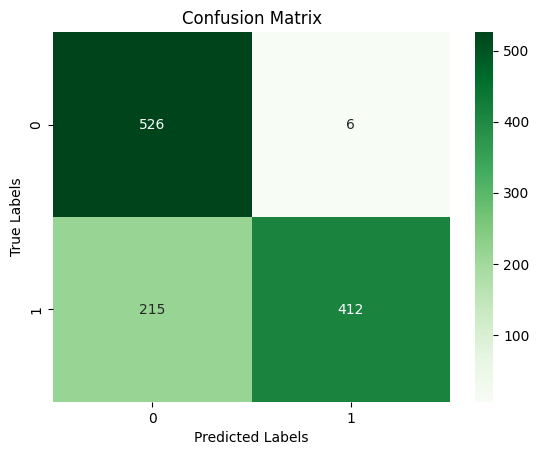

In [ ]:
# Assuming you have true labels (yr_test) and predicted labels (y_pred_smote)
cm = confusion_matrix(yr_test, y_pred_smote)

# Create a heatmap of the confusion matrix with color-coded cells
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

#Random Forest Classifier


The Random Forest Classifier is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. Each decision tree in the random forest is built independently and contributes to the final prediction through a majority voting or averaging mechanism.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, criterion ='gini', random_state=100, max_depth=6, min_samples_leaf=8 )
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1028
           1       0.71      0.43      0.53       379

    accuracy                           0.80      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



In [ ]:
smoteenn = SMOTEENN()
x_resampled, y_resampled = smoteenn.fit_resample(x, y)

In [ ]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled,y_resampled,test_size =0.2)

In [ ]:
model_rf_smote = RandomForestClassifier(criterion ='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote_rf = model_dt.predict(xr_test)
y_pred_smote_rf


array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(yr_test, y_pred_smote_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       545
           1       0.98      0.63      0.77       617

    accuracy                           0.80      1162
   macro avg       0.84      0.81      0.79      1162
weighted avg       0.85      0.80      0.79      1162



In [ ]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[536   9]
 [227 390]]


#Saving The Model

In [89]:
import pickle

In [90]:
filename = "model.sav"

In [92]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [94]:
# to call the model
loaded_model = pickle.load(open(filename, "rb"))

In [96]:
loaded_model.score(xr_test, yr_test)

0.9414802065404475